In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from icecream import ic

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


#### Import key API code idea from Nicole Lund. Shared in UofA-PHX-VIRT-DATA-PT-03-2021, Slack: Resources Channel

In [4]:

# Import API key
from api_keys import weather_api_key
if weather_api_key == "YOUR KEY HERE!":
    import sys
    sys.path.append(r"/Users/rosaicelaroman/Desktop/Data_BootCamp/APIs/config_keys/")
    from api_keys_v2 import weather_api_key


In [6]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


607

#### Created base URL and established the units. Also created the dataframe where data will be stored.

In [8]:

base_url = "http://api.openweathermap.org/data/2.5/weather?q="
units = 'metric'
weather_df=pd.DataFrame({'cities': cities})

weather_df.head()

,cities
0,taolanaro
1,road town
2,yellowknife
3,east london
4,bredasdorp


#### Initiated the rest of the columns for the dataframe

In [9]:
weather_df['lat'] = ""
weather_df['lng'] = ""
weather_df['temp'] = ""
weather_df['humidity'] = ""
weather_df['cloudiness'] = ""
weather_df['wind'] = ""
weather_df.head()

,cities,lat,lng,temp,humidity,cloudiness,wind
0,taolanaro,,,,,,
1,road town,,,,,,
2,yellowknife,,,,,,
3,east london,,,,,,
4,bredasdorp,,,,,,


#### For loop to iterate the datafame rows and populate them with the data from the response. The exception also populates the empty column values with NaN values.

In [10]:
for index, row in weather_df.iterrows():
    # count+=1
    city = row['cities']
    cities_found = []
    
    print(f'Retrieving results for Index {index}: {city}')
    try:
        response = requests.get(base_url+city+"&units="+units+'&appid=' + weather_api_key).json()
        weather_df.loc[index, 'lat'] = response['coord']['lat']
        weather_df.loc[index, 'lng'] = response['coord']['lon']
        weather_df.loc[index, 'temp'] = response['main']['temp']
        weather_df.loc[index, 'humidity'] = response['main']['humidity']
        weather_df.loc[index, 'cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'wind'] = response['wind']['speed']
        cities_found.append(city)

        print(f'Found city: {city}')
    except:
        print(f"Missing city: {city}... Skipping")
        weather_df.loc[index, 'lat'] = float('NaN')
        weather_df.loc[index, 'lng'] = float('NaN')
        weather_df.loc[index, 'temp'] = float('NaN')
        weather_df.loc[index, 'humidity'] = float('NaN')
        weather_df.loc[index, 'cloudiness'] = float('NaN')
        weather_df.loc[index, 'wind'] = float('NaN')
    print(f'--------------------')
    # ic(response['coord']['lat'])
    # ic(response['coord']['lon'])
    # ic(response['main']['temp'])
    # ic(response['main']['humidity'])
    # ic(response['clouds']['all'])
    # ic(cities_found)


    # break


    # break

Retrieving results for Index 0: taolanaro
Missing city: taolanaro... Skipping
--------------------
Retrieving results for Index 1: road town
Found city: road town
--------------------
Retrieving results for Index 2: yellowknife
Found city: yellowknife
--------------------
Retrieving results for Index 3: east london
Found city: east london
--------------------
Retrieving results for Index 4: bredasdorp
Found city: bredasdorp
--------------------
Retrieving results for Index 5: aklavik
Found city: aklavik
--------------------
Retrieving results for Index 6: severo-kurilsk
Found city: severo-kurilsk
--------------------
Retrieving results for Index 7: mataura
Found city: mataura
--------------------
Retrieving results for Index 8: aviles
Found city: aviles
--------------------
Retrieving results for Index 9: punta arenas
Found city: punta arenas
--------------------
Retrieving results for Index 10: barentsburg
Missing city: barentsburg... Skipping
--------------------
Retrieving results f

In [11]:
weather_df.head()

,cities,lat,lng,temp,humidity,cloudiness,wind
0,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN
1,road town,18.4167,-64.6167,25.19,80,19,2.68
2,yellowknife,62.456,-114.353,-10.21,62,75,3.6
3,east london,-33.0153,27.9116,15,88,20,2.06
4,bredasdorp,-34.5322,20.0403,8,93,97,1.03


#### Drop rows with na values that were added in the dataframe above.

In [12]:
weather_df.dropna(inplace=True)
weather_df.head(20)

,cities,lat,lng,temp,humidity,cloudiness,wind
1,road town,18.4167,-64.6167,25.19,80,19,2.68
2,yellowknife,62.456,-114.353,-10.21,62,75,3.6
3,east london,-33.0153,27.9116,15,88,20,2.06
4,bredasdorp,-34.5322,20.0403,8,93,97,1.03
5,aklavik,68.2191,-135.011,1.47,55,77,3.6
6,severo-kurilsk,50.6789,156.125,3.02,88,95,3.01
7,mataura,-46.1927,168.864,12.22,77,75,2.24
8,aviles,43.5547,-5.9248,14.65,82,0,2.57
9,punta arenas,-53.15,-70.9167,5.78,93,75,1.03
11,albany,42.6001,-73.9662,6.12,52,2,3.18


In [15]:
weather_df.to_csv(r"/Users/rosaicelaroman/Desktop/Data_BootCamp/LearnPython/python-api-challenge/WeatherPy/all_weather.csv",header=True, index=True)

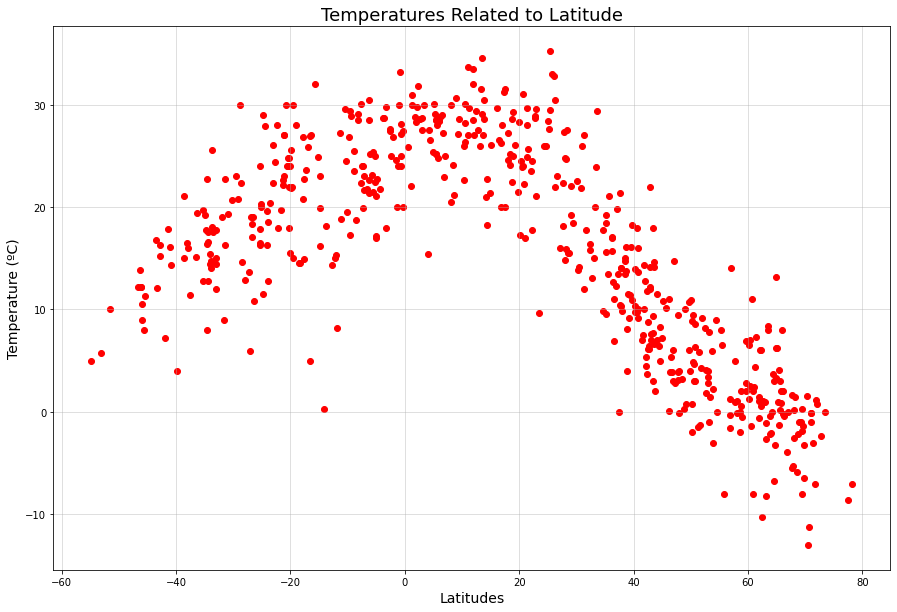

In [16]:
plt.figure(figsize=(15,10))
y_axis = weather_df['temp']
x_axis = weather_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='r')
plt.grid(True, alpha=0.5)
plt.ylabel('Temperature (ºC)', size=14)
plt.xlabel('Latitudes', size=14)
plt.title("Temperatures Related to Latitude", size=18)
plt.savefig('temp_lat.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
plt.show()

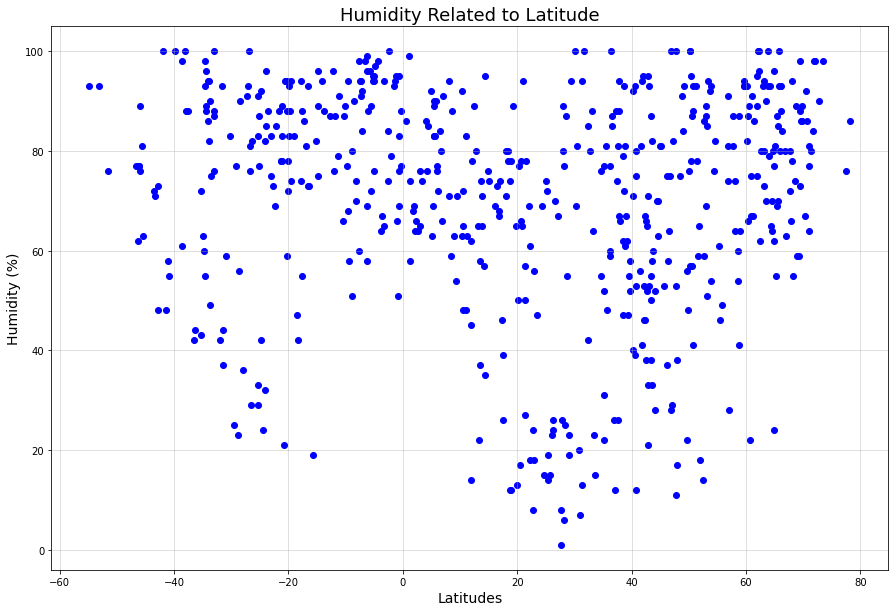

In [17]:
plt.figure(figsize=(15,10))
y_axis = weather_df['humidity']
x_axis = weather_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='b')
plt.grid(True, alpha=0.5)
plt.ylabel('Humidity (%)', size=14)
plt.xlabel('Latitudes', size=14)
plt.title("Humidity Related to Latitude", size=18)
plt.savefig('hum_lat.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
plt.show()

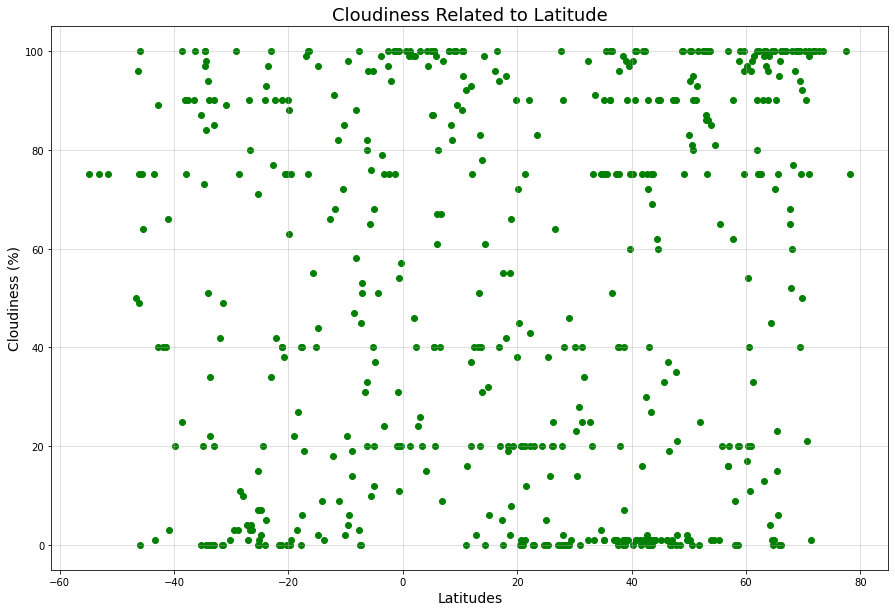

In [18]:
plt.figure(figsize=(15,10))
y_axis = weather_df['cloudiness']
x_axis = weather_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='g')
plt.grid(True, alpha=0.5)
plt.ylabel('Cloudiness (%)', size=14)
plt.xlabel('Latitudes', size=14)
plt.title("Cloudiness Related to Latitude", size=18)
plt.savefig('cloud_lat.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
plt.show()

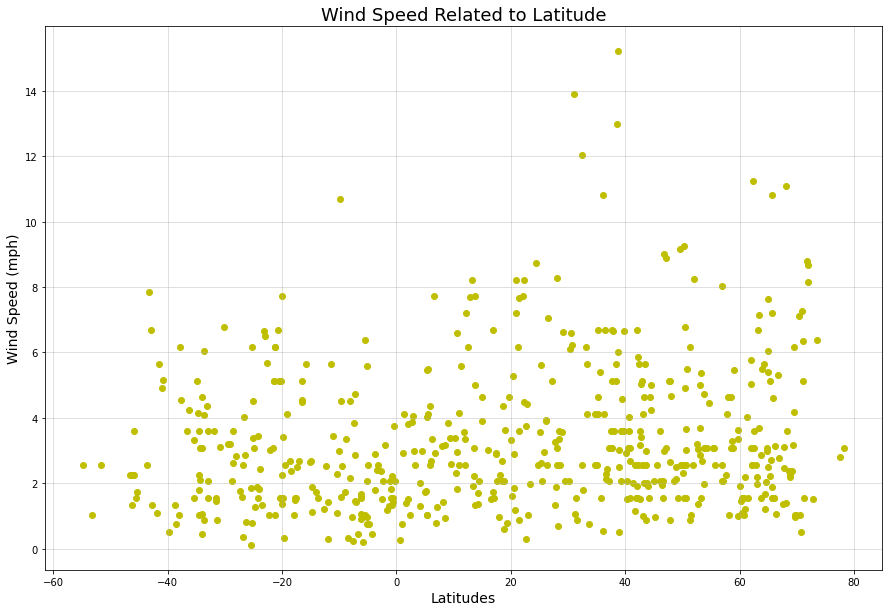

In [19]:
plt.figure(figsize=(15,10))
y_axis = weather_df['wind']
x_axis = weather_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='y')
plt.grid(True, alpha=0.5)
plt.ylabel('Wind Speed (mph)', size=14)
plt.xlabel('Latitudes', size=14)
plt.title("Wind Speed Related to Latitude", size=18)
plt.savefig('wind_lat.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
plt.show()

In [20]:
north_hemi_df = weather_df[(weather_df.lat>=0)]
north_hemi_df.head(20)

,cities,lat,lng,temp,humidity,cloudiness,wind
1,road town,18.4167,-64.6167,25.19,80,19,2.68
2,yellowknife,62.456,-114.353,-10.21,62,75,3.6
5,aklavik,68.2191,-135.011,1.47,55,77,3.6
6,severo-kurilsk,50.6789,156.125,3.02,88,95,3.01
8,aviles,43.5547,-5.9248,14.65,82,0,2.57
11,albany,42.6001,-73.9662,6.12,52,2,3.18
12,cabo san lucas,22.8909,-109.912,21.07,56,20,4.43
14,mezen,65.8522,44.24,7.99,80,98,4.6
18,norman wells,65.282,-126.833,1,55,90,5.14
20,pacific grove,36.6177,-121.917,10.99,85,51,2.12


In [21]:
weather_df.to_csv(r"/Users/rosaicelaroman/Desktop/Data_BootCamp/LearnPython/python-api-challenge/WeatherPy/north_weather.csv",header=True, index=True)

In [22]:
south_hemi_df = weather_df[(weather_df.lat<0)]
south_hemi_df.head(20)

,cities,lat,lng,temp,humidity,cloudiness,wind
3,east london,-33.0153,27.9116,15,88,20,2.06
4,bredasdorp,-34.5322,20.0403,8,93,97,1.03
7,mataura,-46.1927,168.864,12.22,77,75,2.24
9,punta arenas,-53.15,-70.9167,5.78,93,75,1.03
13,puerto rico,-26.796,-55.024,18.37,81,80,0.35
15,hobart,-42.8794,147.329,16.3,48,40,6.69
16,port alfred,-33.5906,26.891,17.54,75,0,6.05
17,saint-philippe,-21.3585,55.7679,22.14,78,0,5.14
19,busselton,-33.65,115.333,25.56,49,22,0.89
21,cape town,-33.9258,18.4232,14.69,82,0,4.63


In [23]:
weather_df.to_csv(r"/Users/rosaicelaroman/Desktop/Data_BootCamp/LearnPython/python-api-challenge/WeatherPy/south_weather.csv",header=True, index=True)

The line equation is y = -0.51 x + 32.9
The r-squared is: 0.82


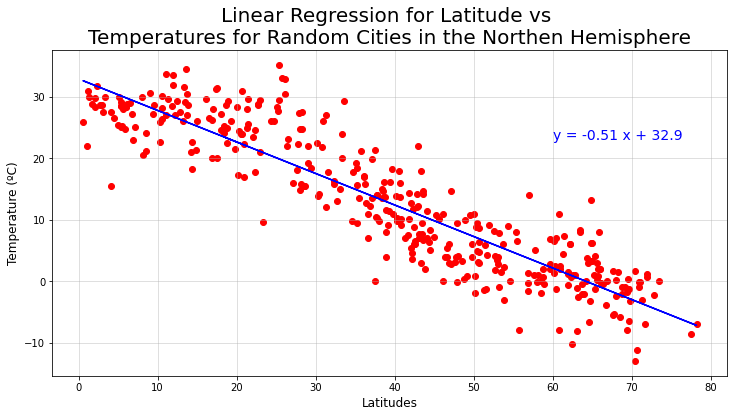

In [26]:
x_axis = north_hemi_df["lat"].astype(float) 
y_axis = north_hemi_df["temp"].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='r')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(60, 23, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Temperature (ºC)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nTemperatures for Random Cities in the Northen Hemisphere', size=20)
plt.savefig('temp_north.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')

print(f"The r-squared is: {r_value**2:.2f}")

The line equation is y = 0.29 x + 26.16
The r-squared is: 0.38


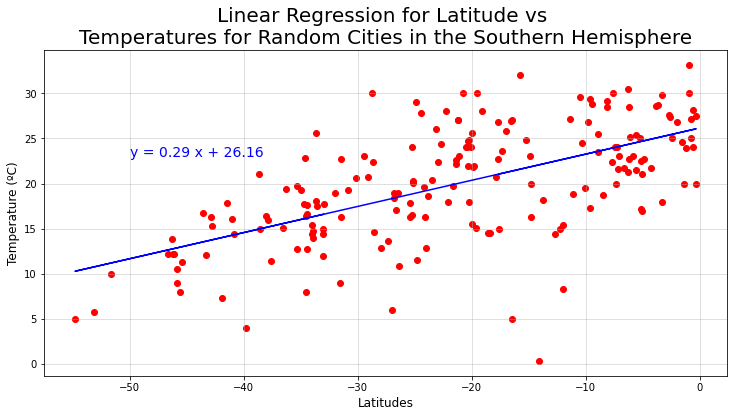

In [27]:
x_axis = south_hemi_df["lat"].astype(float) 
y_axis = south_hemi_df["temp"].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='r')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(-50, 23, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Temperature (ºC)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nTemperatures for Random Cities in the Southern Hemisphere', size=20)
plt.savefig('temp_south.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
print(f"The r-squared is: {r_value**2:.2f}")

The line equation is y = 0.25 x + 56.84
The r-squared is: 0.04


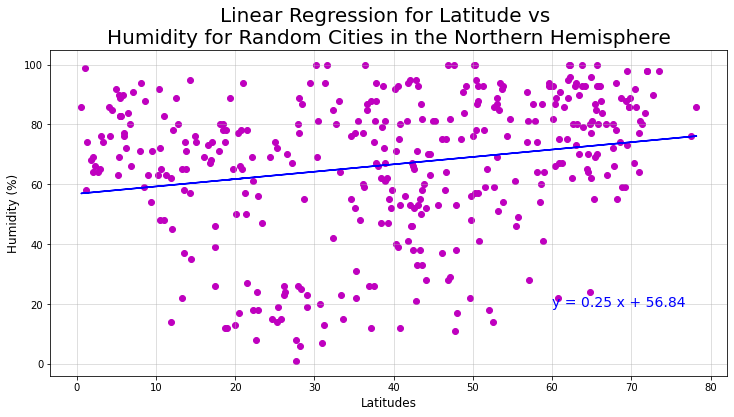

In [28]:
x_axis = north_hemi_df["lat"].astype(float) 
y_axis = north_hemi_df["humidity"].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='m')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(60, 19, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nHumidity for Random Cities in the Northern Hemisphere', size=20)
plt.savefig('hum_north.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
print(f"The r-squared is: {r_value**2:.2f}")


The line equation is y = 0.24 x + 82.23
The r-squared is: 0.03


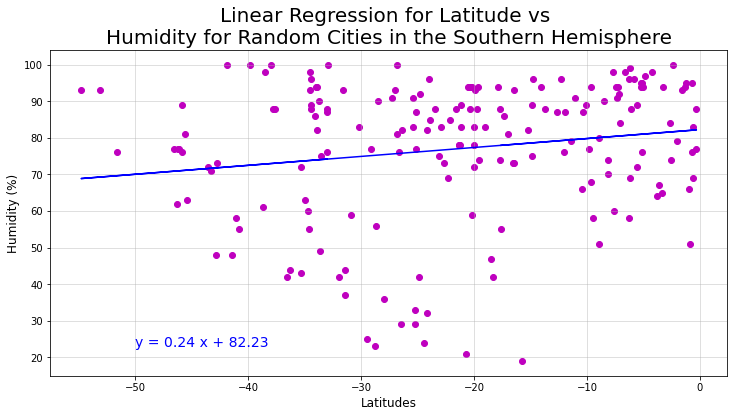

In [29]:
x_axis = south_hemi_df["lat"].astype(float) 
y_axis = south_hemi_df["humidity"].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='m')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(-50, 23, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nHumidity for Random Cities in the Southern Hemisphere', size=20)
plt.savefig('hum_south.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
print(f"The r-squared is: {r_value**2:.2f}")

The line equation is y = 0.25 x + 42.54
The r-squared is: 0.02


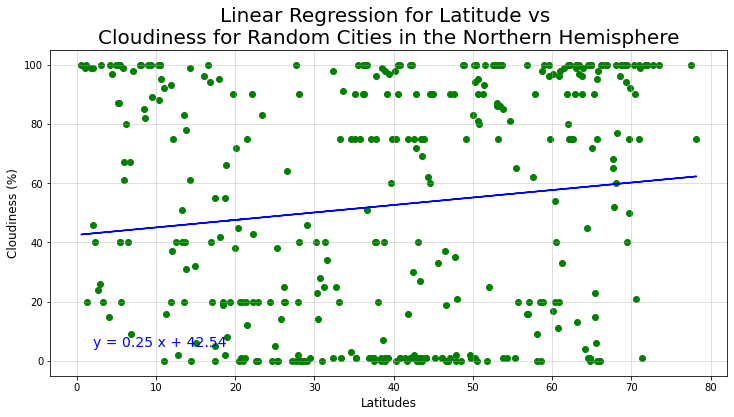

In [30]:
y_axis = north_hemi_df['cloudiness'].astype(float) 
x_axis = north_hemi_df['lat'].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='g')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(2, 5, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nCloudiness for Random Cities in the Northern Hemisphere', size=20)
plt.savefig('cloud_north.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
print(f"The r-squared is: {r_value**2:.2f}")


The line equation is y = -0.06 x + 46.72
The r-squared is: 0.00


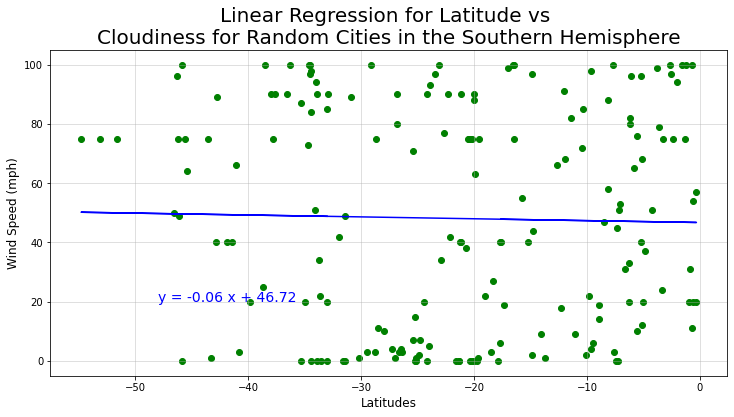

In [31]:
y_axis = south_hemi_df['cloudiness'].astype(float) 
x_axis = south_hemi_df['lat'].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='g')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(-48, 20, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Wind Speed (mph)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nCloudiness for Random Cities in the Southern Hemisphere', size=20)
plt.savefig('cloud_south.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
print(f"The r-squared is: {r_value**2:.2f}")

The line equation is y = 0.01 x + 3.14
The r-squared is: 0.01


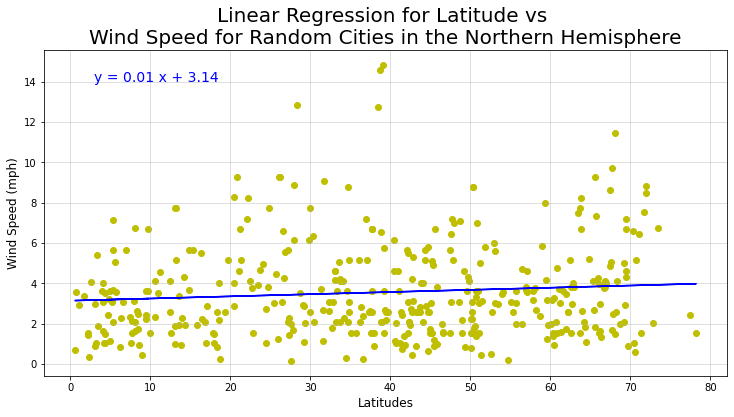

In [84]:
y_axis = north_hemi_df['wind'].astype(float) 
x_axis = north_hemi_df['lat'].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='y')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(3, 14, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Wind Speed (mph)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nWind Speed for Random Cities in the Northern Hemisphere', size=20)
plt.savefig('wind_north.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')

print(f"The r-squared is: {r_value**2:.2f}")

The line equation is y = -0.02 x + 2.36
The r-squared is: 0.02


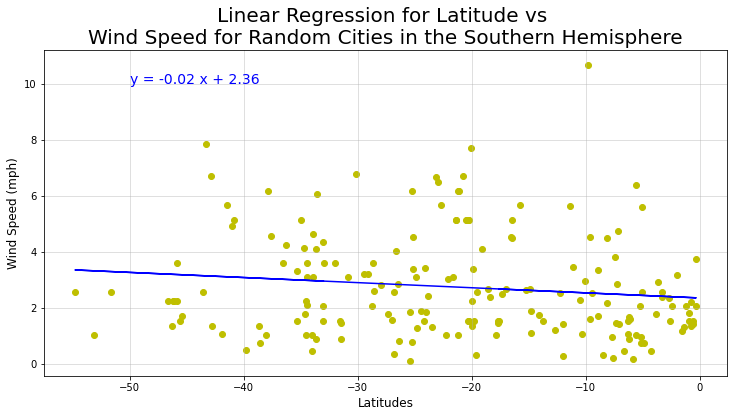

In [32]:
y_axis = south_hemi_df['wind'].astype(float) 
x_axis = south_hemi_df['lat'].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='y')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(-50, 10, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Wind Speed (mph)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nWind Speed for Random Cities in the Southern Hemisphere', size=20)
plt.savefig('wind_south.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')

print(f"The r-squared is: {r_value**2:.2f}")